# Introduction to artificial neural networks

This notebook begins a new unit on artificial neural networks (ANNs or just "neural nets" for short).  Neural nets provide an extremely flexible approach for solving a wide range of data analysis problems. From a high-level view, neural nets are conceptually quite simple, but, as we will see, first appearances can be deceiving.  We will build our understanding of neural nets slowly, by carefully investigating one piece at a time.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


## 1. Implementing a neuron.

<div>
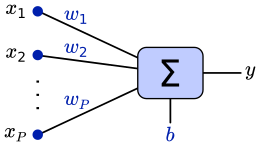
</div>

We have now seen the basic conceptual design of artificial neurons, illustrated above.  To review, each neuron has:

* One or more scalar inputs ($x_1$, $x_2$, etc.).
* Scalar values called "weights" that multiply the inputs ($w_1$, $w_2$, etc.).
* A scalar value called the "bias" ($b$).
* A summer that adds the weighted inputs and the bias to generate the neuron's output.

The weights and bias are the _parameters_ of the neuron.

As an exercise, try implementing a single artificial neuron using the inputs and parameters defined below.

In [2]:
x = np.array([1, 2, 3, 4])
w = np.array([0.472898163, 0.2364490815, 0.157632721, 0.11822454075])
b = 1.25

# Given the input x and provided parameter values, what is the output of the neuron?
y = sum(x*w) + b # take input multiply by each value and add the bias and print th eoutput
print(y)


3.141592652


Let's write this a different way and see if this reminds us of anything...

$$ y = b + w_1x_1 + w_2x_2 + ... + w_px_p $$

Ringing any bells? 

**A network with a single neuron is essentially a linear regression.**



## 2. Fitting a complete, single-neuron network.

<div>
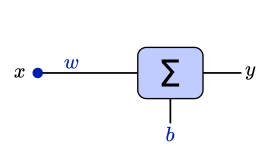
</div>

Now that we have a basic understanding of the components of an artificial neuron, let's try creating and fitting the simplest possible neural network: a single neuron with a single input.  Due to time constraints, we will not do this from scratch (although doing so is a valuable exercise and I encourage you to try it).  Instead, we will rely on the Python library [Keras](https://keras.io/), to do most of the heavy lifting for us.

Note that there are many alternatives to Keras and you might find that one or more of these alternatives fit your use case or preferences better.  Software for neural nets and deep learning is rapidly evolving, so explore your options!

### a. Build a reference regression model using `sklearn`

Let's return to the dataset we used in [07_Intro_sklearn_student.ipynb](07_Intro_sklearn_student.ipynb). This was a simulated dataset for linear regression, where we generated the data using the formula $y=2x+1 + Error $.

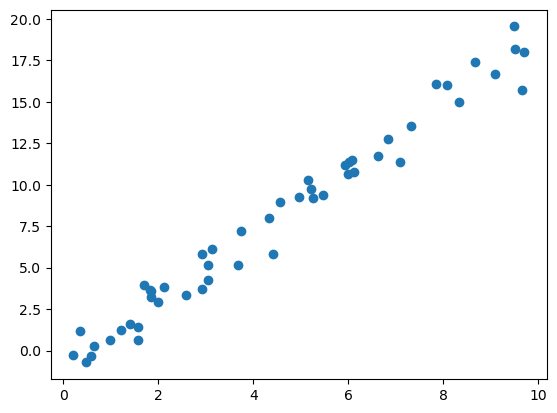

In [3]:
# Make and plot the data
rng = np.random.RandomState(42) #random state
x = 10 * rng.rand(50)
y = 2*x - 1 + rng.randn(50)

plt.scatter(x,y)

R^2: 0.9749140085676858
Slope: [1.9776566], Intercept: -0.9033107255311146


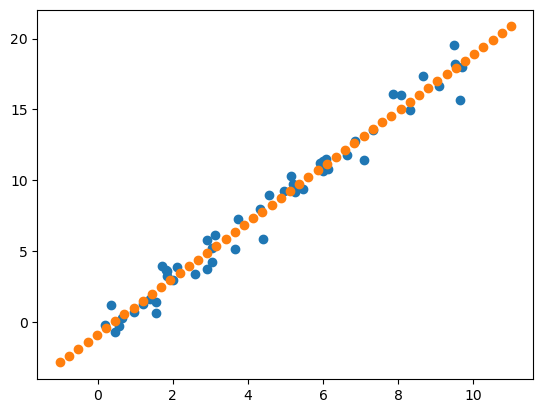

In [4]:
# Reshape the X and fit the LinearRegression model
X = x[:,np.newaxis]
model = LinearRegression(fit_intercept=True)
model.fit(X,y)

# Create xfit and yfit to plot the result
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit) #model.predict and plot the data

# Visualize the results
plt.scatter(x,y)  # Scatter plot of our training data
plt.scatter(xfit,yfit)  # Our linear model

print(f'R^2: {model.score(X,y)}')
print(f'Slope: {model.coef_}, Intercept: {model.intercept_}') # true value of slope is 2 and is pretty close 

### b. Translate the model to a neural network using `keras`

Now, let's attempt to reproduce our regression analysis in the context of fitting a neural network!

In [5]:
import tensorflow as tf # red output is Obtained. When running GPU red comments are obtained commonly as more of a feedback. 
#Questionalbe comments include cuDNN when one is already registered. Red output 

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score

2024-03-04 14:21:51.470369: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 14:21:51.470418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 14:21:51.471353: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-04 14:21:51.477583: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
#creating the model
model = keras.Sequential([
      layers.Dense(1, input_shape=(1,))
    ])

model.summary() # model summaries will eb looked at a lot. Output says that all the layers are connected. Weigth and bias are the two aprameters seen in this model
#trainable and untrainable parameters will be seen
#python tried to keep everythign on a GPU in a GPU and allocates. WHn suing multiple notebooks in s session go to cirble in ood on top of git and shut down all lterminal sy ou ar enot using.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-03-04 14:25:24.172283: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79087 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:87:00.0, compute capability: 8.0


Let's look at some of the details here:
 * As with `sklearn` we are starting off by defining a `model`
 * In this case, we use the `keras.Sequential` class, used to make layered networks. 
     * For this example, we are using a single layer.
 * We add a layer using the `layers.Dense` class. 
     * A dense layer in a neural network means that every neuron is connected to every input (we only have one neuron and 1 input)
     * We construct this one layers saying that it has 1 neuron and gets a 1
     * To be able to see the `model.summary()` we need to specify the input shape.
     
 * The model summary shows a text view of the "network" we have defined.
   * Our network has one, dense layer
   * It outputs one thing
   * The layer, and the total model, have 2 parameters (slope and intercept)
   
Next we compile the model, a needed step where we can specify a loss function, optimizer and metrics we want to track during training.
 

In [7]:
# Compile the model--a necessary step with Keras models
model.compile(loss='mse') #determing what type of mse you want to use.

In [8]:
# Now we can fit the model
#  Note: I've set verbose=0 so we don't get thousands of lines of output

model.fit(X, y, epochs=1000, verbose=0) #Need t set the number of epochs to save time. Default numebr of epochs with Keras is 32.
#https://faroit.com/keras-docs/2.1.3/models/sequential/#:~:text=If%20unspecified%2C%20it%20will%20default,x%20and%20y%20data%20provided.

#verbose=0: No output is displayed during training.
#verbose=1: A progress bar is displayed, showing the number of completed epochs, the training loss, and other metrics if specified. This is the default value.
#verbose=2: Each epoch is displayed as a single line of output, showing the epoch number, training loss, and other metrics if specified.
#when using vervbose  = 1 loss is small


2024-03-04 14:28:31.499838: I external/local_xla/xla/service/service.cc:168] XLA service 0x14bf38d2a6d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-04 14:28:31.499884: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-03-04 14:28:31.524113: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-04 14:28:31.574658: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8800
I0000 00:00:1709580511.656702 2334370 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 [==============================] - 0s 3ms/step
R_2: 0.9730611947625415


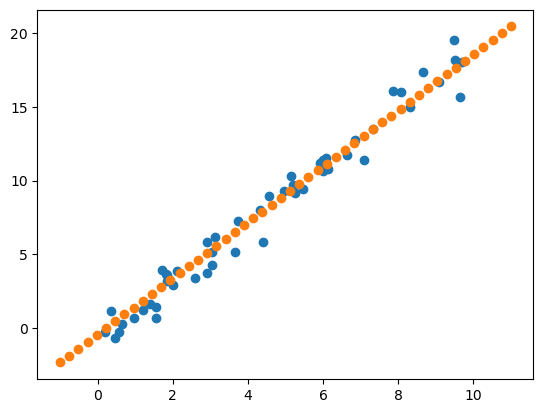

In [9]:
# Using the code from above...
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

# Visaulize the results
plt.scatter(x,y)  # Scatter plot of our training data
plt.scatter(xfit,yfit)  # Our linear model

# Get the predicted ys for each X (rather than the yfit used for the plot) 
y_pred = model.predict(X)
print(f'R_2: {r2_score(y, y_pred)}')
#to remove outputs you can right click and remove outputs

In [10]:
model.get_weights() # this gets the parameter outputs. Slope is 1.900 which is a bi tlower. After 1000

[array([[1.9005759]], dtype=float32), array([-0.4491403], dtype=float32)]